## Exploratory Analisis

1) First we are going to read the data, and we are going to create the df_sales,df_orders. Which contains the information of sales and order respectly.


In [222]:
import pandas as pd
import numpy as np


df_exchange=pd.read_csv('cloud_retail_monthly_exchange_rates.csv')
df_sales=pd.read_csv('cloud_retail_sales_data.csv')
df_orders=pd.read_csv('cloud_retail_orders_data.csv')

df_exchange=df_exchange.drop_duplicates()

df_sales=df_sales.drop_duplicates()



C:\Users\David\AppData\Local\Temp\ipykernel_13192\546576452.py:7: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_orders=pd.read_csv('cloud_retail_orders_data.csv')


- Convert qualifying_date to datatime, create the YearMonth with year,month.
- and merge the sales dataframe with the dataframe exchange.
- Delete duplicated.


In [223]:
# Assuming 'qualifying_date' in 'df_sales' is in datetime format, if not, convert it
df_sales['qualifying_date'] = pd.to_datetime(df_sales['qualifying_date'])

# Extract the year and month and create a new column 'YearMonth' in 'df_sales'
df_sales['YearMonth'] = df_sales['qualifying_date'].dt.to_period('M')


df_exchange['created_month'] = pd.to_datetime(df_exchange['created_month'])

# Extract the year and month and create a new column 'YearMonth' in 'df_exchange'
df_exchange['YearMonth'] = df_exchange['created_month'].dt.to_period('M')

df_sales = pd.merge(df_sales, df_exchange, how='left', on=['YearMonth','country'])



C:\Users\David\AppData\Local\Temp\ipykernel_13192\2627908298.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df_sales['YearMonth'] = df_sales['qualifying_date'].dt.to_period('M')


- In the "cloud_retail_monthly_exchange_rates" database, we store the monthly conversion rates of different currencies to US dollars, which provides us with the exchange rates for each month and year. It's worth considering merging or unifying this exchange rate information with the "cloud_retail_sales_data" dataset. This consolidation allows for standardizing the sales data, ensuring that all figures are represented in the same currency, namely US dollars.

- To achieve this, we can perform a left join on the "cloud_retail_sales_data," linking the data by year, month, and country. This operation appends the sales data with the corresponding exchange rates, facilitating the conversion of all sales figures to US dollars.

## Sales Data Exploratory Analysis

1) Initially, we conduct an assessment of data distribution to identify missing or blank values. To achieve this, we employ the 'isnull()' function, which enables us to count the number of missing (NA) values in each column. This process provides valuable insights into the quality and completeness of our observed data.

In [198]:
missing_values = df_sales.isnull().sum()
missing_values

sales_opportunity_id           0
hashed_facility_id             0
hashed_facility_name           0
country                        0
account_executive              0
is_active_employee             0
stage                          0
onboarding_fee                 0
deposit_fee                 1134
processing_rate             1096
cold_storage_cu_ft          1051
dry_storage_cu_ft           1052
frozen_storage_cu_ft        1053
monthly_cold_shelf_fee       961
monthly_dry_shelf_fee        968
monthly_frozen_shelf_fee     979
currency_code_x                0
churn_status                   0
churn_date                  3896
hashed_organization_id      3251
hashed_organization_name    3251
qualifying_date                0
pitching_date                536
negotiation_date            1008
commitment_date             3198
closed_won_date             3317
google/ofo_score            3715
account_category            2684
account_subcategory         2932
instagram_followers         2724
YearMonth 

2) Within our dataset, consisting of 4,618 rows, we have observed a significant number of missing values in several columns, specifically in 'churn_date,' 'google/ofo_score,' 'account_subcategory,' and 'instagram_followers.' It is imperative to handle these columns with heightened attention during our analysis.

In [199]:
df_sales.dtypes

sales_opportunity_id                     object
hashed_facility_id                       object
hashed_facility_name                     object
country                                  object
account_executive                        object
is_active_employee                         bool
stage                                    object
onboarding_fee                          float64
deposit_fee                             float64
processing_rate                         float64
cold_storage_cu_ft                      float64
dry_storage_cu_ft                       float64
frozen_storage_cu_ft                    float64
monthly_cold_shelf_fee                  float64
monthly_dry_shelf_fee                   float64
monthly_frozen_shelf_fee                float64
currency_code_x                          object
churn_status                               bool
churn_date                               object
hashed_organization_id                   object
hashed_organization_name                

- We've examined the data types of each column and found that 'is_active_employee' is of boolean type. Among the significant numeric columns, we have 'onboarding_fee,' 'deposit_fee,' 'processing_rate,' 'cold_storage_cu_ft,' 'dry_storage_cu_ft,' 'frozen_storage_cu_ft,' 'monthly_cold_shelf_fee,' 'monthly_dry_shelf_fee,' 'monthly_frozen_shelf_fee,' and 'google/ofo_score,' all of which are of float64 data type. This analysis is crucial as it guides us in selecting the most relevant variables for creating informative graphs that can help us assess the enterprise's performance

- I intend to analyze the statistics, including mean, standard deviation, maximum, minimum, and percentiles, of our integer and float columns to gain insight into their distributions. However, a noteworthy challenge arises because our data originates from four distinct countries, each with its own currency. Combining this data for a unified analysis would be akin to comparing apples to oranges. As a solution, I suggest segregating the data by country and conducting individual exploratory analyses for each country.

### Creation of variales for Analisis
 
- In our data analysis process, we are creating new variables for further examination. Specifically, we are calculating 'total_sq_ft,' representing the total amount of space, and 'total_fee,' which is the sum of all fees and serves as a key component of the enterprise's gross revenue.(The total_fee is already in Us Dolars)

- Additionally, we have performed data cleaning by addressing an outlier in the 'country' column. In our dataset, we identified a single observation labeled as 'New Zealand,' which was deemed an outlier. As a result, we have removed this particular data point, as a single data point can be inconclusive in the context of our analysis.

In [214]:
df_sales = df_sales[df_sales['country'] != 'New Zealand']

# Calculate the total storage (total_ft)
df_sales['total_ft_sales'] = df_sales['cold_storage_cu_ft'] + df_sales['dry_storage_cu_ft'] + df_sales['frozen_storage_cu_ft']
# Calculate the total fee (total_fee) all in Us dolars
df_sales['total_fee_sales'] = df_sales['onboarding_fee']/df_sales['exchange_rate'] + df_sales['deposit_fee']/df_sales['exchange_rate']+ df_sales['monthly_cold_shelf_fee']/df_sales['exchange_rate'] + df_sales['monthly_dry_shelf_fee']/df_sales['exchange_rate'] + df_sales['monthly_frozen_shelf_fee']/df_sales['exchange_rate']



grouped_by_country = df_sales.groupby('country')
grouped_by_country.describe()


,sales_opportunity_id,hashed_facility_id,hashed_facility_name,country,account_executive,is_active_employee,stage,onboarding_fee,deposit_fee,processing_rate,...,google/ofo_score,account_category,account_subcategory,instagram_followers,YearMonth,created_month,currency_code_y,exchange_rate,total_ft_sales,total_fee_sales
0,HI5226,6c601837-403c-425f-a51c-31428ed1a67e,facility_3,Brazil,Bobby Hamilton,True,Negotiation,10.0,1000.0,10.0,...,4.8,CR - Baked Goods,CR - Cakes,64000.0,2023-07,2023-07-01,BRL,4.79,20.0,628.392484
1,SD4514,76a6ef30-ddb2-4178-8c37-86c0d10db4b3,facility_30,Colombia,Shepard Mills,True,Negotiation,0.0,0.0,0.0,...,4.0,CR - Frozen Desserts,CR - Ice Cream,11100.0,2023-07,2023-07-01,COP,4059.00,8.0,98.546440
2,WW7107,7aae3115-311b-449f-88f4-0f1612ecfcee,facility_44,Brazil,Armani Murillo,True,Closed Won,175.0,1200.0,10.0,...,4.9,CR - Baked Goods,CR - Cakes,5705.0,2023-06,2023-06-01,BRL,4.86,8.0,406.378601
3,ZC1725,88aaaf99-a444-4e0f-99f6-267b635faa53,facility_41,Brazil,Armani Murillo,True,Closed Won,175.0,1200.0,10.0,...,4.9,CR - Baked Goods,CR - Cakes,5705.0,2023-06,2023-06-01,BRL,4.86,8.0,406.378601
4,RG6629,dcc461ae-c80c-46cc-a5dc-4a5a72761510,facility_17,Brazil,Renata Bradshaw,True,Closed Won,0.0,1150.0,5.0,...,NaN,CR - Frozen Desserts,CR - Gelato,3296.0,2023-06,2023-06-01,BRL,4.86,40.0,709.876543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,QV9718,47e2d054-8b82-420c-b1b0-18010f57489c,facility_29,Mexico,Scarlett Rowland,False,Closed Won,0.0,6000.0,5.0,...,NaN,CR - Frozen Desserts,CR - Ice Cream,539.0,2020-04,2020-04-01,MXN,24.20,20.0,495.867769
4614,GG6947,864e0a3c-ecba-4305-b3ff-f22edd58c902,facility_34,Mexico,Scarlett Rowland,False,Closed Won,0.0,6000.0,5.0,...,NaN,CR - Frozen Desserts,CR - Ice Cream,539.0,2020-03,2020-03-01,MXN,22.26,16.0,539.083558
4615,PM7755,565273fe-0074-421d-b1e1-796d1e4390e1,facility_25,Mexico,Scarlett Rowland,False,Closed Won,0.0,6000.0,5.0,...,NaN,CR - Frozen Desserts,CR - Ice Cream,539.0,2020-03,2020-03-01,MXN,22.26,8.0,539.083558
4616,XH8393,565273fe-0074-421d-b1e1-796d1e4390e1,facility_25,Mexico,Dustin Jimenez,False,Closed Won,0.0,10000.0,5.0,...,NaN,CR - Baked Goods,CR - Donuts,9951.0,2020-03,2020-03-01,MXN,22.26,20.0,673.854447


In [219]:
df_sales=df_sales[['sales_opportunity_id','stage','hashed_facility_name','hashed_organization_name','country','stage','total_ft_sales','total_fee_sales','exchange_rate','YearMonth','processing_rate','google/ofo_score','account_category','account_subcategory','instagram_followers']]
df_sales

,sales_opportunity_id,stage,hashed_facility_name,hashed_organization_name,country,stage,total_ft_sales,total_fee_sales,exchange_rate,YearMonth,processing_rate,google/ofo_score,account_category,account_subcategory,instagram_followers
0,HI5226,Negotiation,facility_3,NaN,Brazil,Negotiation,20.0,628.392484,4.79,2023-07,10.0,4.8,CR - Baked Goods,CR - Cakes,64000.0
1,SD4514,Negotiation,facility_30,NaN,Colombia,Negotiation,8.0,98.546440,4059.00,2023-07,0.0,4.0,CR - Frozen Desserts,CR - Ice Cream,11100.0
2,WW7107,Closed Won,facility_44,organization_64,Brazil,Closed Won,8.0,406.378601,4.86,2023-06,10.0,4.9,CR - Baked Goods,CR - Cakes,5705.0
3,ZC1725,Closed Won,facility_41,organization_64,Brazil,Closed Won,8.0,406.378601,4.86,2023-06,10.0,4.9,CR - Baked Goods,CR - Cakes,5705.0
4,RG6629,Closed Won,facility_17,organization_21,Brazil,Closed Won,40.0,709.876543,4.86,2023-06,5.0,NaN,CR - Frozen Desserts,CR - Gelato,3296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,QV9718,Closed Won,facility_29,organization_425,Mexico,Closed Won,20.0,495.867769,24.20,2020-04,5.0,NaN,CR - Frozen Desserts,CR - Ice Cream,539.0
4614,GG6947,Closed Won,facility_34,organization_425,Mexico,Closed Won,16.0,539.083558,22.26,2020-03,5.0,NaN,CR - Frozen Desserts,CR - Ice Cream,539.0
4615,PM7755,Closed Won,facility_25,organization_425,Mexico,Closed Won,8.0,539.083558,22.26,2020-03,5.0,NaN,CR - Frozen Desserts,CR - Ice Cream,539.0
4616,XH8393,Closed Won,facility_25,organization_308,Mexico,Closed Won,20.0,673.854447,22.26,2020-03,5.0,NaN,CR - Baked Goods,CR - Donuts,9951.0


## Analysis in a Common Currency

Here, we are grouping the data by country, which allows us to observe the actual data distribution. However, when we analyze the data collectively without considering the currency of each country, the results can be significantly affected. This is because, for instance, while 1 US dollar may be equivalent to 4,100 Colombian pesos, the same dollar in Mexico may have a different value. Therefore, it's crucial to standardize the metrics and express all values in a common currency to ensure fair and meaningful comparisons.

- Standardize all the data to a common currency.(Given the Exchang in that year, month)
- I need to merge the data based on the exchange rate or conduct the analysis for each individual country. For each month of a given year, I will perform the analysis accordingly.


- Now is an apportune time to choose the numerical columns from which we intend to derive insights and examine the statistics of each selected column. This process will aid us in gaining a deeper understandin of the data. We are going to do the analisis for each country.

Exploratory Analysis for Brazil:

Summary Statistics:
       processing_rate  google/ofo_score  instagram_followers  total_ft_sales  total_fee_sales
count      1594.000000        371.000000           978.000000     1652.000000      1583.000000
mean         11.953701          4.781402         18787.044785       14.883172       674.615790
std          55.719949         26.064987         40627.484173       81.717817       754.235905
min           0.000000          0.000000             0.000000        0.000000        45.977011
25%           7.000000          0.000000          2042.000000        4.000000       379.506641
50%          10.000000          4.700000          5678.500000        8.000000       524.691358
75%          10.000000          5.000000         15100.000000       12.000000       692.384005
max        1000.000000        500.000000        413000.000000     3020.000000     12854.430380



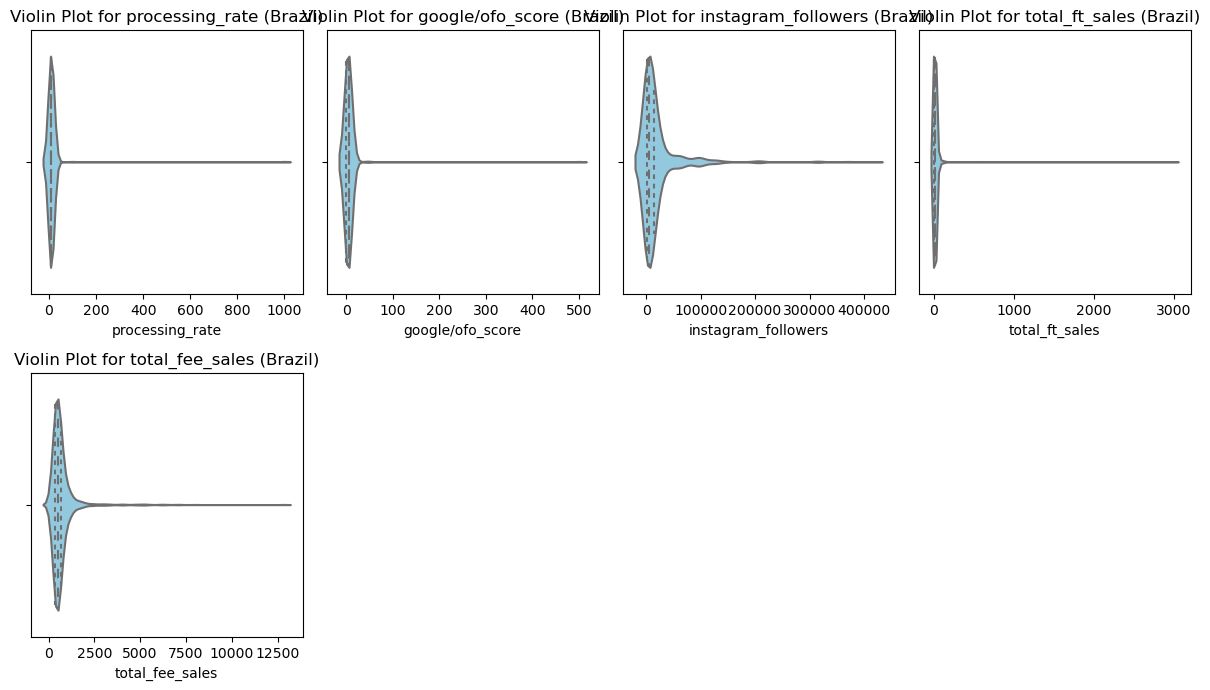

Exploratory Analysis for Colombia:

Summary Statistics:
       processing_rate  google/ofo_score  instagram_followers  total_ft_sales  total_fee_sales
count       503.000000        188.000000           256.000000      499.000000       500.000000
mean          8.993042          4.542021         21344.481641      452.376754      1145.876860
std           1.934807          3.670389         32199.838838     9848.049075     11908.909641
min           0.000000          0.000000             0.000000        0.000000         0.000685
25%           8.000000          4.000000          5713.500000        8.000000       323.751517
50%           9.000000          4.400000         13750.000000        8.000000       426.533801
75%          10.000000          5.000000         22625.000000        8.000000       623.565475
max          14.000000         50.000000        255000.000000   220000.000000    265946.806471



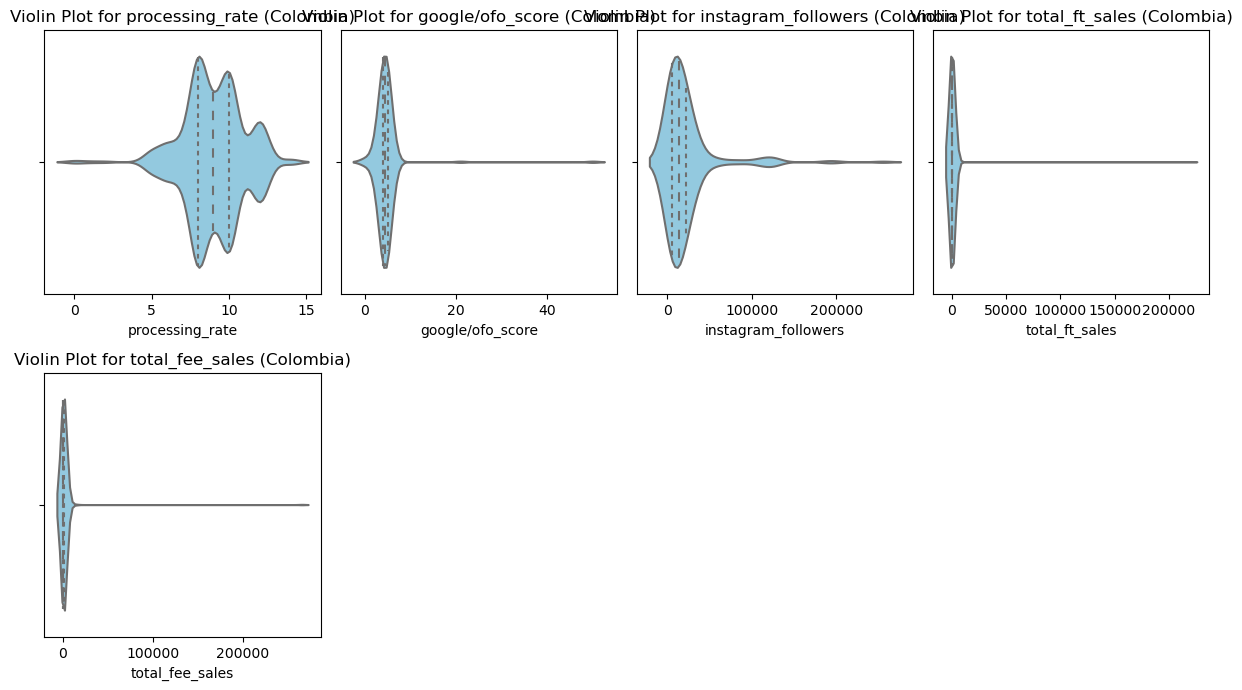

Exploratory Analysis for Mexico:

Summary Statistics:
       processing_rate  google/ofo_score  instagram_followers  total_ft_sales  total_fee_sales
count      1425.000000        344.000000           660.000000     1409.000000      1392.000000
mean          9.819347          4.388663         14719.698182       37.376451      1166.244894
std           7.719268          4.553442         43046.043287      645.088649      5644.808935
min           0.000000          0.000000             0.000000        0.000000        87.868198
25%           8.000000          4.175000           539.000000        8.000000       395.312157
50%          10.000000          4.500000          2548.000000        8.000000       594.786145
75%          10.000000          4.900000         11625.000000       16.000000       970.878454
max         125.000000         72.000000        533000.000000    24000.000000    161870.503597



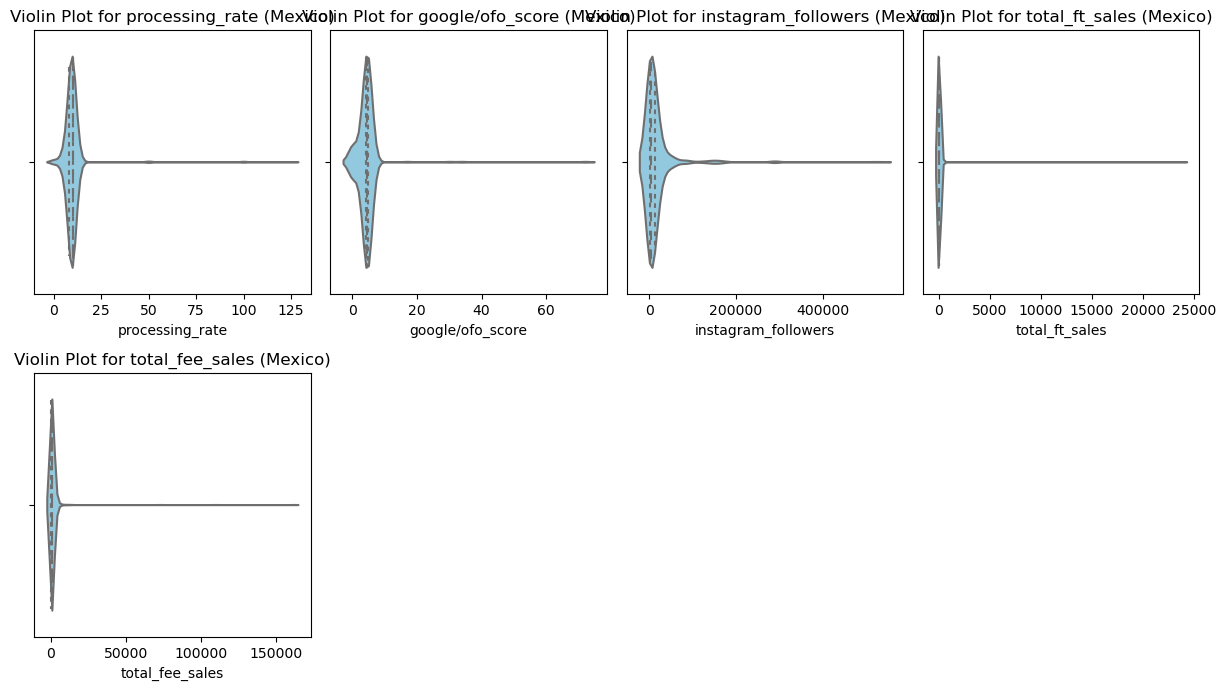

In [202]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns
numerical_columns = ['processing_rate','google/ofo_score', 'instagram_followers','total_ft_sales','total_fee_sales']

for country, data in grouped_by_country:
    # Filter data for the current country
    df_country = data
    
    # Perform exploratory analysis for the current country
    print(f"Exploratory Analysis for {country}:\n")
    
    # Summary statistics
    summary_stats = df_country[numerical_columns].describe()
    # Convert the summary_stats DataFrame to a string and print all columns
    print(f"Summary Statistics:\n{summary_stats.to_string()}\n")

    
    # Create violin plots for numerical columns
    plt.figure(figsize=(12, 10))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(3, 4, i)
        sns.violinplot(x=df_country[col], color='skyblue', inner='quartile')
        plt.title(f'Violin Plot for {col} ({country})')
        plt.xlabel(col)
    
    plt.tight_layout()
    plt.show()


- In the provided dataset, we observe something quite intriguing. Let's focus on the "processing_rate" column, which indicates the rate calculated as a percentage of the Gross Merchandise Value (GMV). Essentially, the higher the sales volume a customer generates through the organization, the higher their processing fees will be.

- For the specific case of Brazil, the mean processing rate is 12 with a substantial standard deviation of 56, signifying considerable variability. However, we notice an extreme outlier with a value of 1000, which is a deviation of 10 standard deviations from the mean. This outlier is significant and warrants further investigation. It might be a good idea to verify the accuracy of this data by consulting the person responsible for data collection or considering its removal to ensure a more robust analysis.

- Shifting our attention to other columns, the mean for "total_ft" is 15, and the "total_fee" is 675 dollars. Most data points fall within the range of 0 to 1500 dollars, with a maximum value of 12,854. To gain a better understanding of the data distribution and its adherence to a normal distribution, a violin plot could be a useful tool. However, it becomes apparent that this dataset exhibits significant volatility.

- If we intend to conduct a more in-depth analysis, it is essential to consider these exceptional cases (outliers) and concentrate our efforts on areas where data accumulation is more pronounced. This will enable a more accurate and meaningful analysis of the dataset.

- The number of intagram_followers could ghave a linear relationship with the total_ft and totla_fee. Wich could give us an idea of the customer wich are more likely to give us better profits.


Let's break down the data for Colombia, Mexico, and Brazil:

- In Colombia, we have 503 data points. In Mexico, there are 1,425 data points, and in Brazil, we have 1,504 data points.

- In both Colombia and Mexico, the processing rate is approximately 9, with a standard deviation of 2. This suggests that the data is tightly centered around the mean, indicating low volatility. This is a favorable characteristic as it signifies a more stable dataset.

- However, for "total_ft," the mean is 452, but the standard deviation is 9,848! This wide standard deviation reflects significant data volatility. In other words, there are substantial fluctuations in the "total_ft" values, making this aspect of the data less predictable.

- In the "total_fee" column, there is an exceptionally high value of 265,947 dollars. This outlier greatly influences the positive end of the data distribution.

- For Mexico, we observe a similar pattern but with a smaller standard deviation, suggesting that the data in Mexico is more consistent compared to Colombia.

### Correlation Analisis and pairplot for each Country


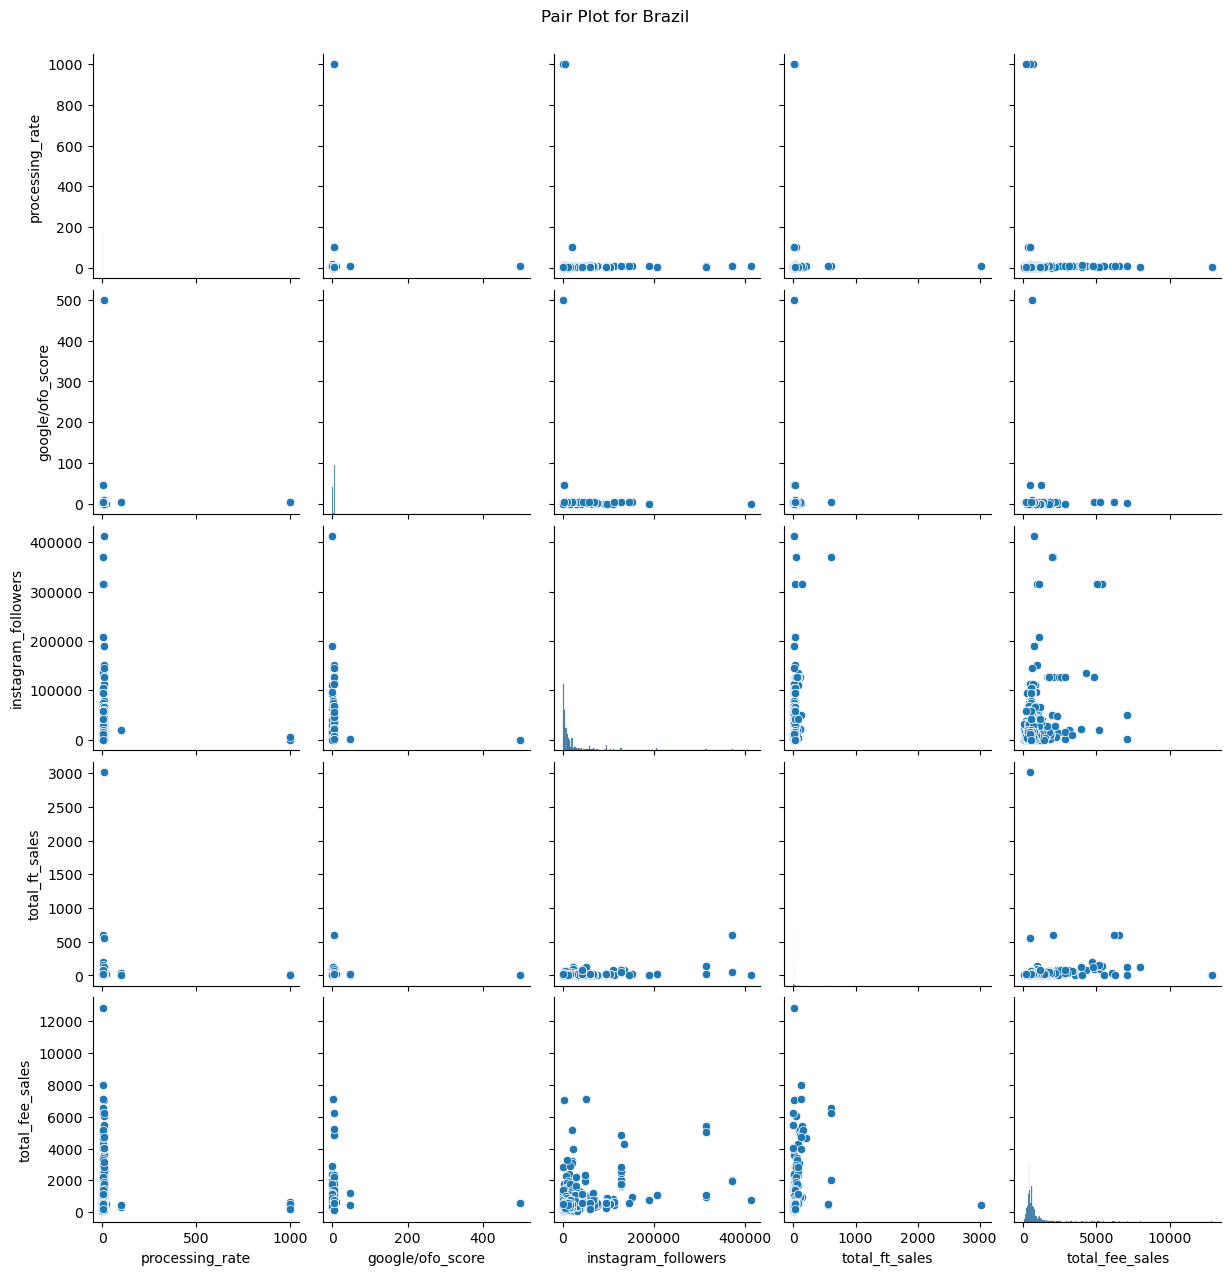

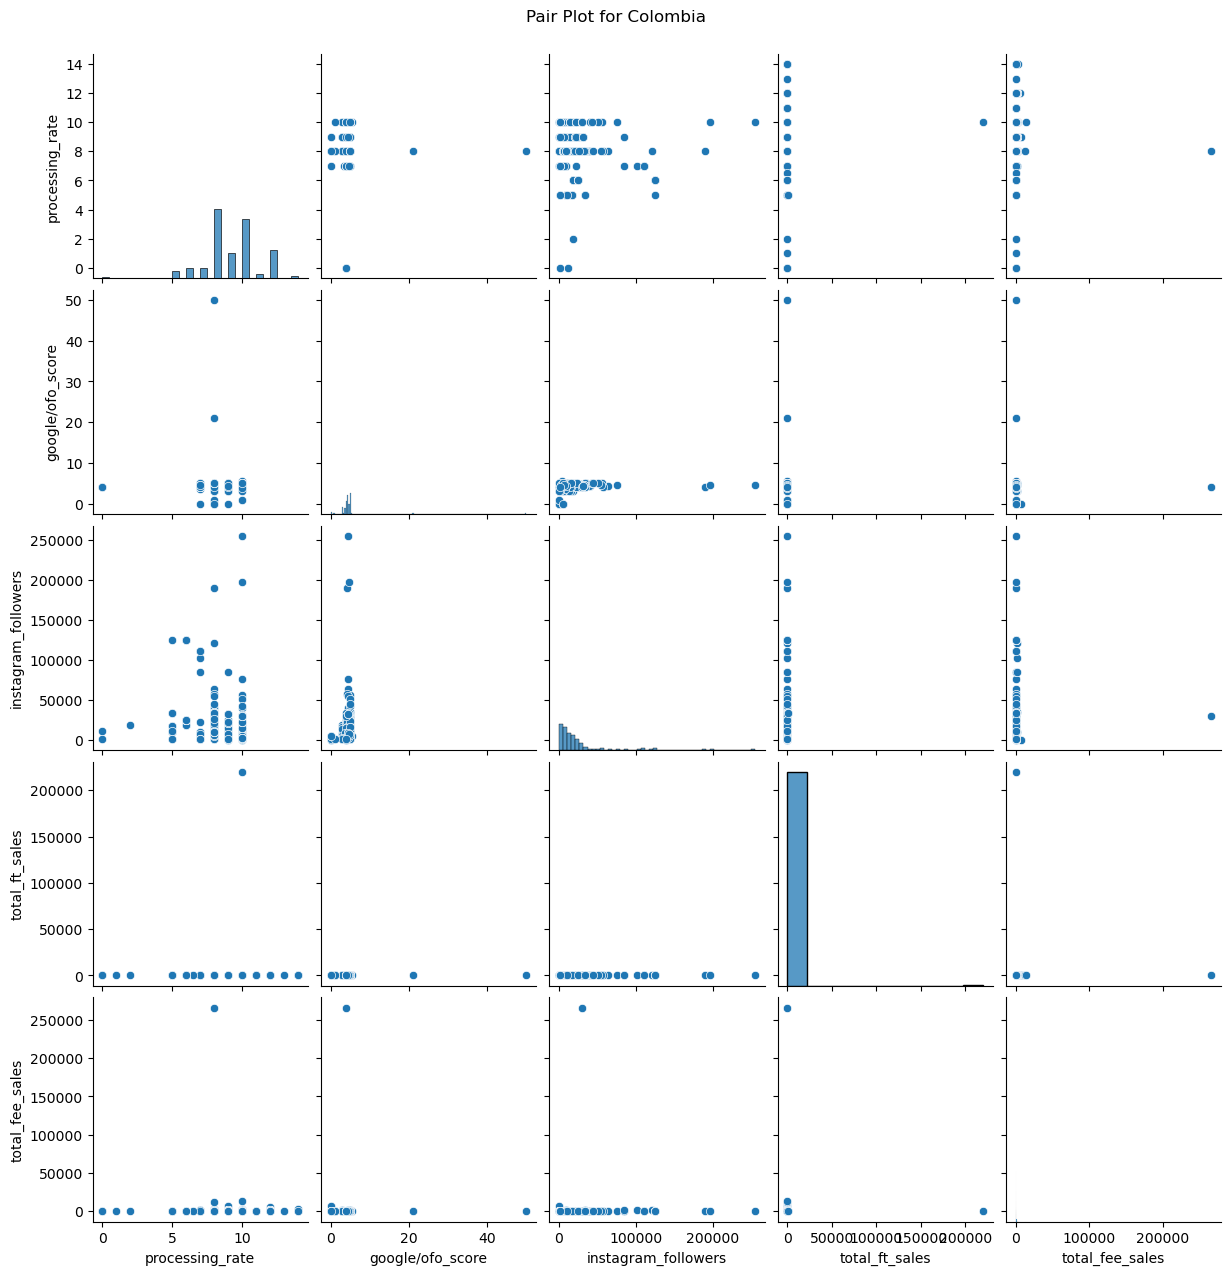

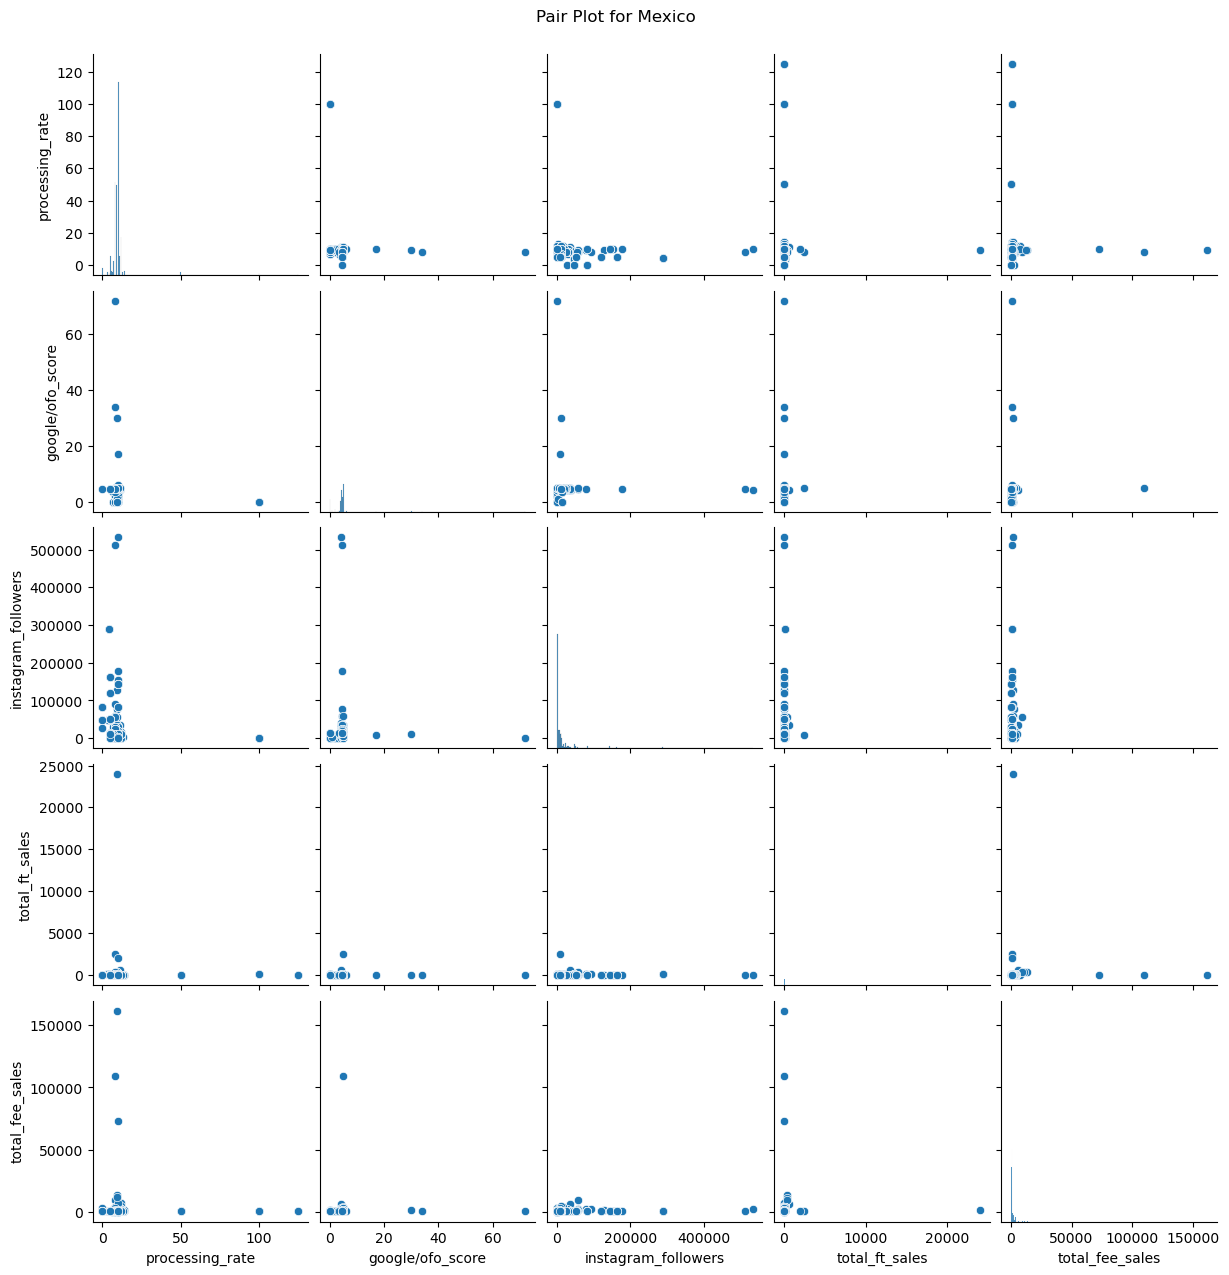

In [203]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped the data by 'country' using 'grouped_by_country'

# List of numerical columns for pair plots
numerical_columns = ['processing_rate','google/ofo_score', 'instagram_followers','total_ft_sales','total_fee_sales']

# Iterate through each country group
for country, data in grouped_by_country:
    # Filter data for the current country
    df_country = data[numerical_columns]

    # Create a pair plot
    sns.pairplot(df_country)
    plt.suptitle(f'Pair Plot for {country}', y=1.02)
    plt.show()


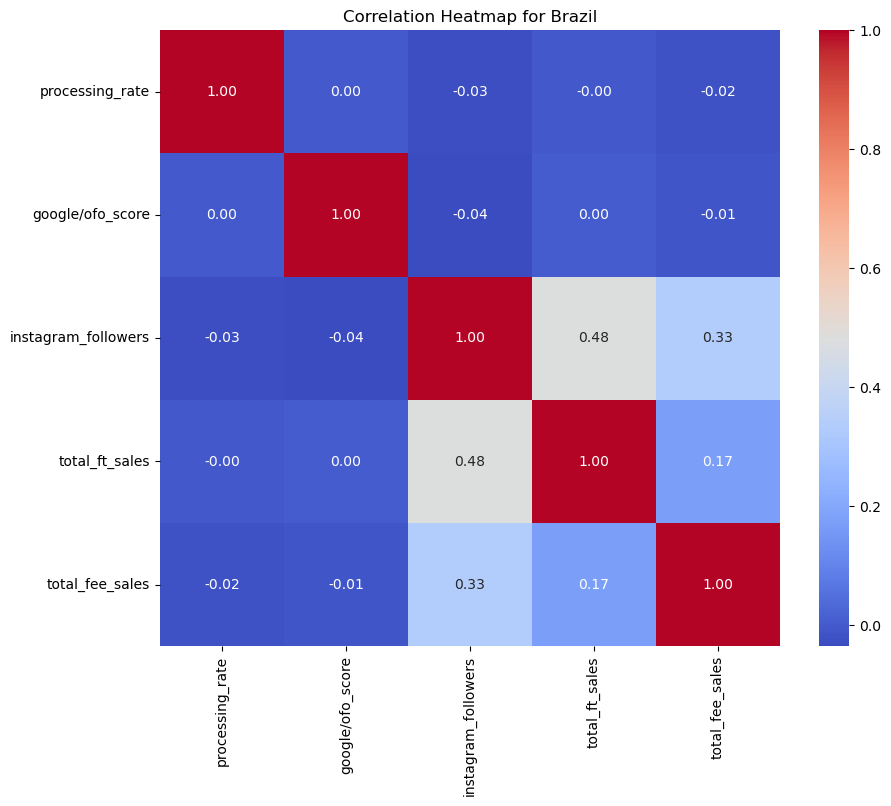

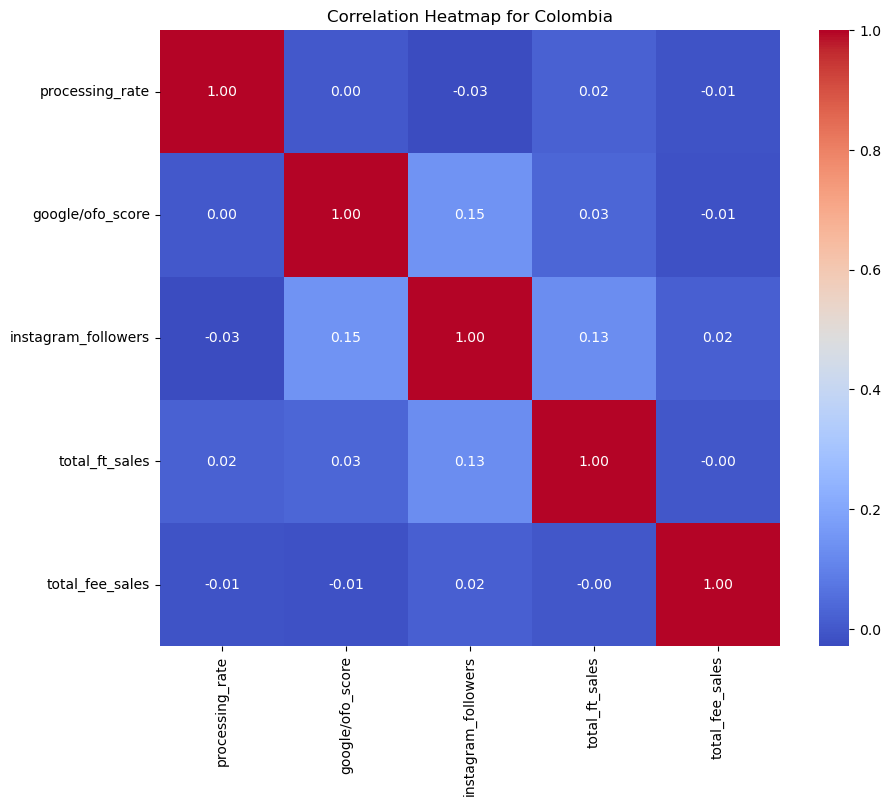

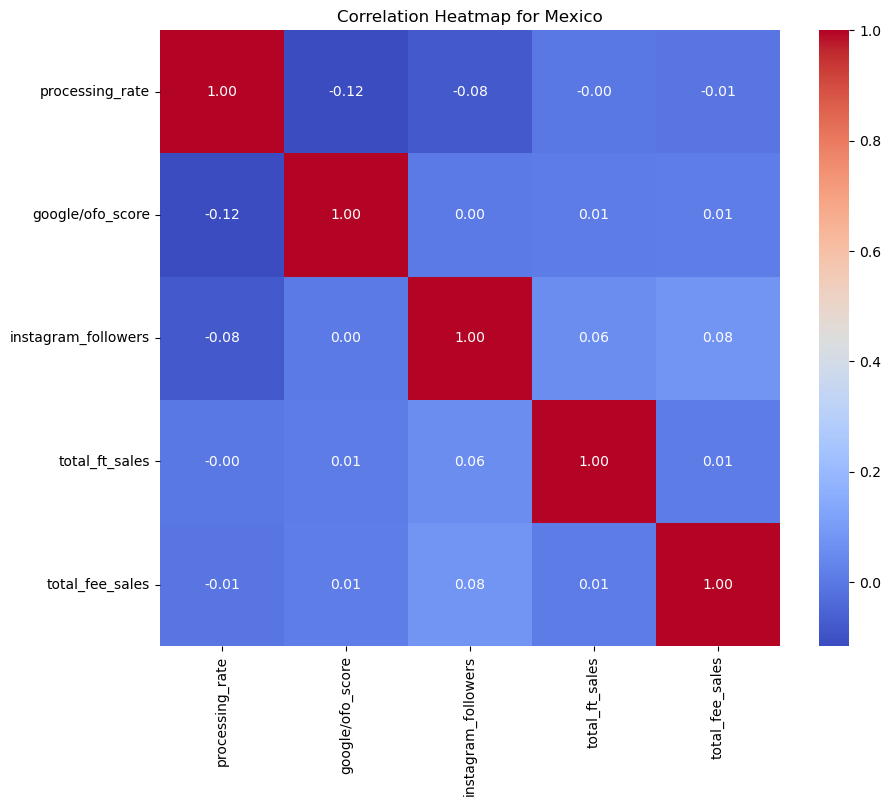

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already grouped the data by 'country' using 'grouped_by_country'

# List of numerical columns for correlation matrix
numerical_columns = ['processing_rate', 'google/ofo_score', 'instagram_followers', 'total_ft_sales', 'total_fee_sales']

# Iterate through each country group
for country, data in grouped_by_country:
    # Filter data for the current country
    df_country = data[numerical_columns]

    # Calculate the correlation matrix
    correlation_matrix = df_country.corr()

    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
    plt.title(f'Correlation Heatmap for {country}')
    plt.show()


### Analysis of Correlation and Pair Plot

- Within the dataset, a noteworthy observation emerges in the context of Brazil. We observe a 0.48% representation of a variable concerning the total number of followers. This finding suggests that in the absence of outliers and with a clean dataset, these two variables might exhibit a linear relationship. This insight could be instrumental in identifying potential high-value customers who are more likely to make substantial purchases and contribute significantly to the company's revenue.
- The subsequent phase could involve investigating these relationships while excluding outliers. However, it's important to note that this is primarily an exploratory analysis, and its full exploration may fall outside the current scope. Nevertheless, it offers valuable insights that could guide future steps and investigations.

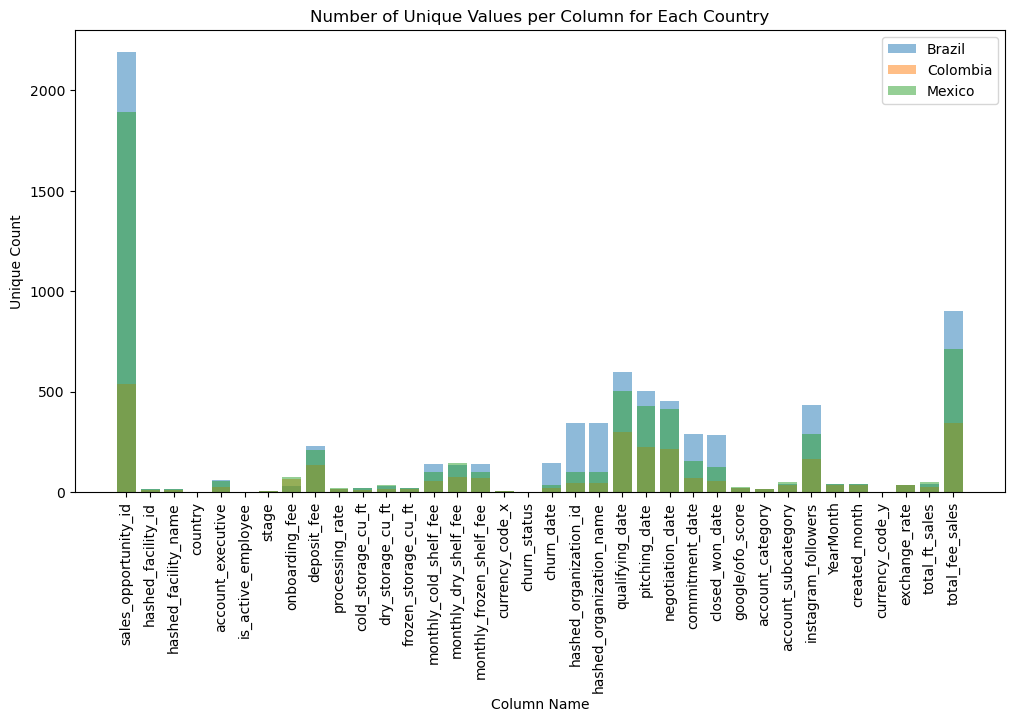

In [205]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_sales' and it's grouped by 'country' using 'grouped_by_country'

# List to store unique counts for each country
unique_counts_list = []

# Iterate through each country group
for country, data in grouped_by_country:
    unique_counts = data.nunique()
    unique_counts_list.append((country, unique_counts))

# Create a bar plot for unique counts per column for each country
plt.figure(figsize=(12, 6))

# Iterate through unique counts for each country
for country, counts in unique_counts_list:
    plt.bar(counts.index, counts, alpha=0.5, label=country)

plt.title('Number of Unique Values per Column for Each Country')
plt.xlabel('Column Name')
plt.ylabel('Unique Count')
plt.xticks(rotation=90)
plt.legend()
plt.show()


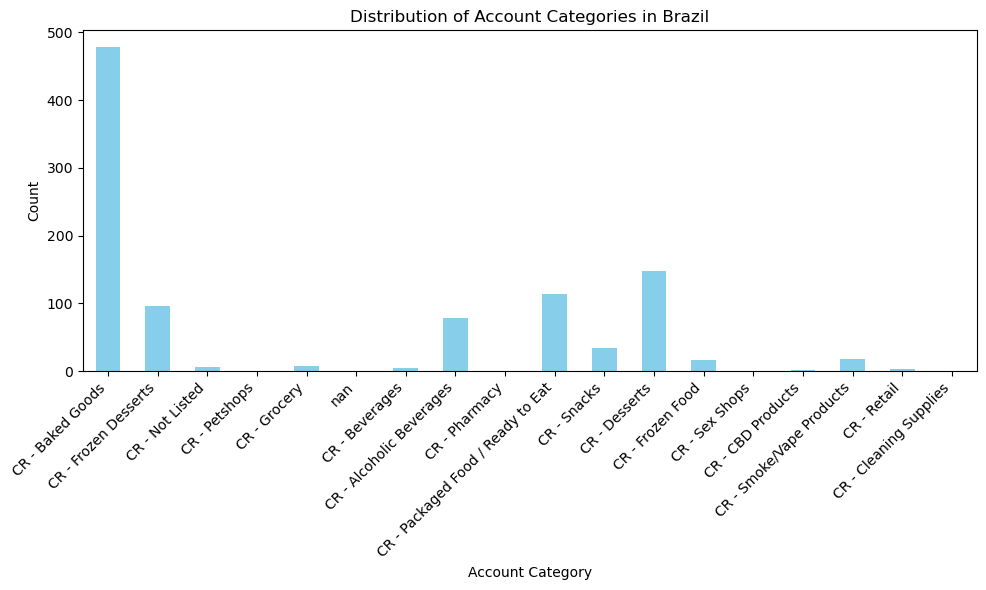

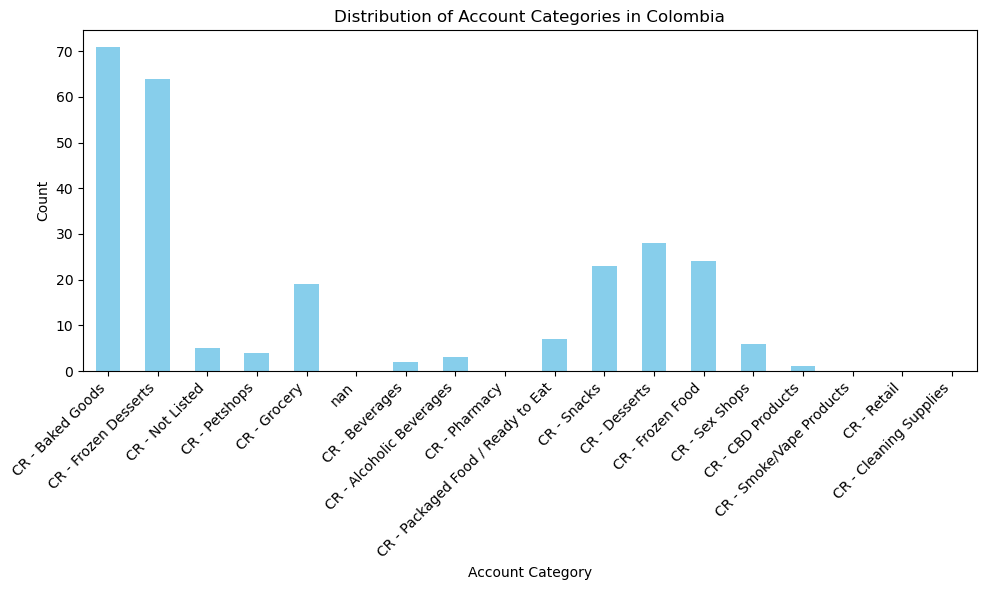

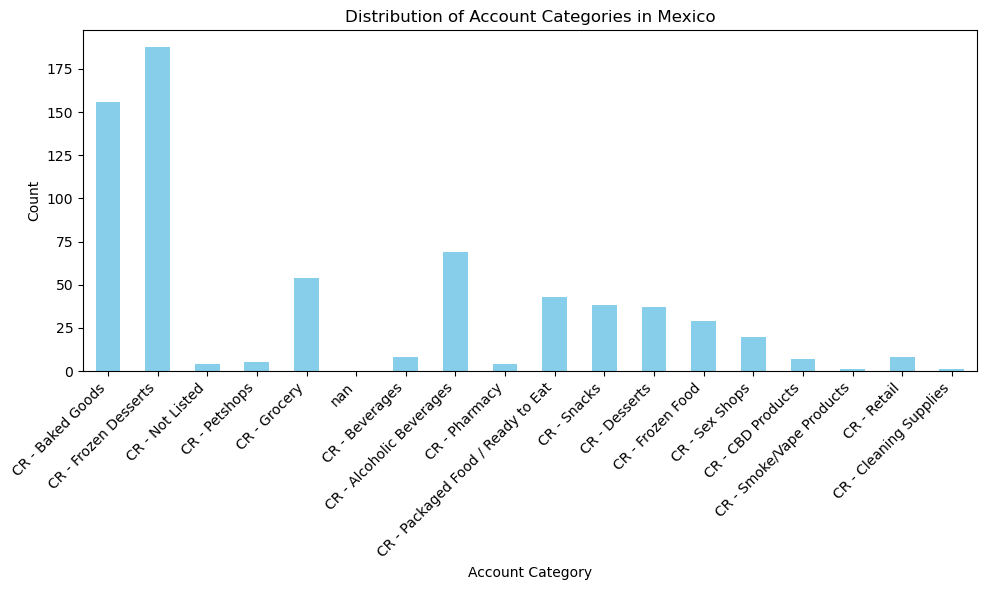

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df_sales' and it's grouped by 'country' using 'grouped_by_country'

# List of unique account categories
account_categories = df_sales['account_category'].unique()

# Iterate through each country group
for country, data in grouped_by_country:
    account_category_counts = data['account_category'].value_counts()
    
    # Create a bar plot for each country
    plt.figure(figsize=(10, 6))
    account_category_counts.reindex(account_categories).plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of Account Categories in {country}')
    plt.xlabel('Account Category')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


- In Colombia and Brazil, the best-selling category is baked goods, while in Mexico, frozen desserts take the lead. Interestingly, alcoholic beverages enjoy higher sales in Mexico compared to other countries. This analysis provides insights into the preferences of citizens from different nations and sheds light on how businesses' product offerings impact their success.

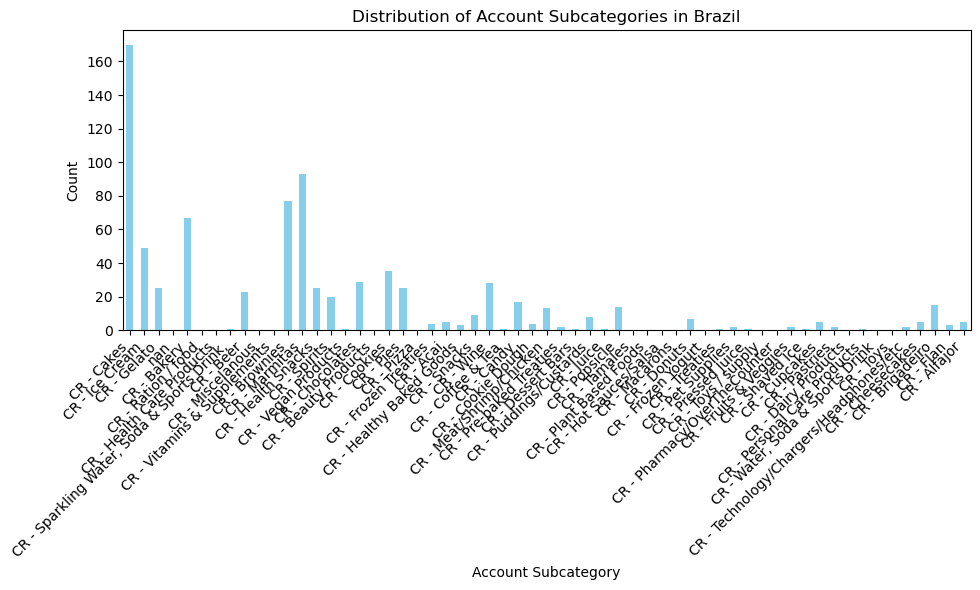

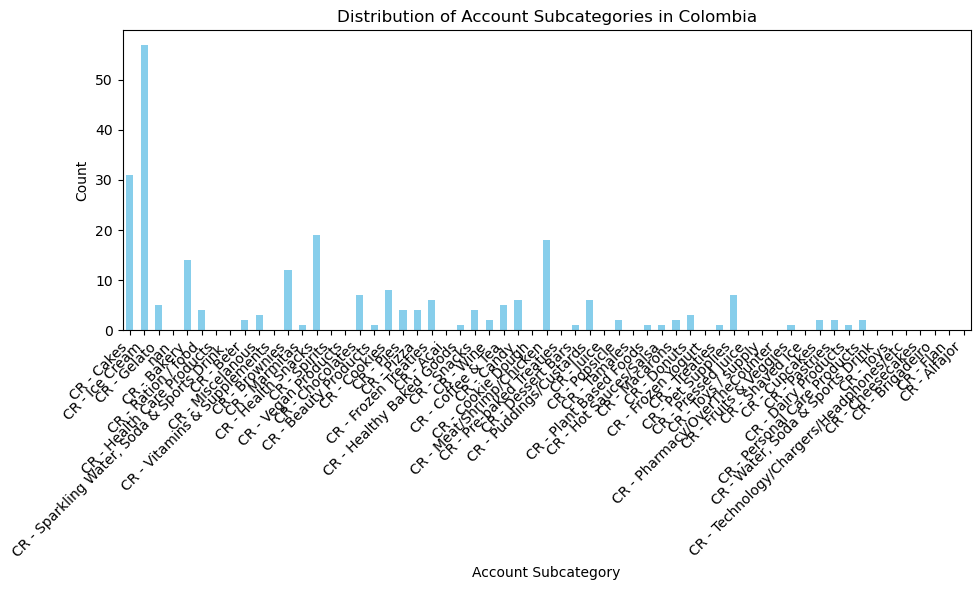

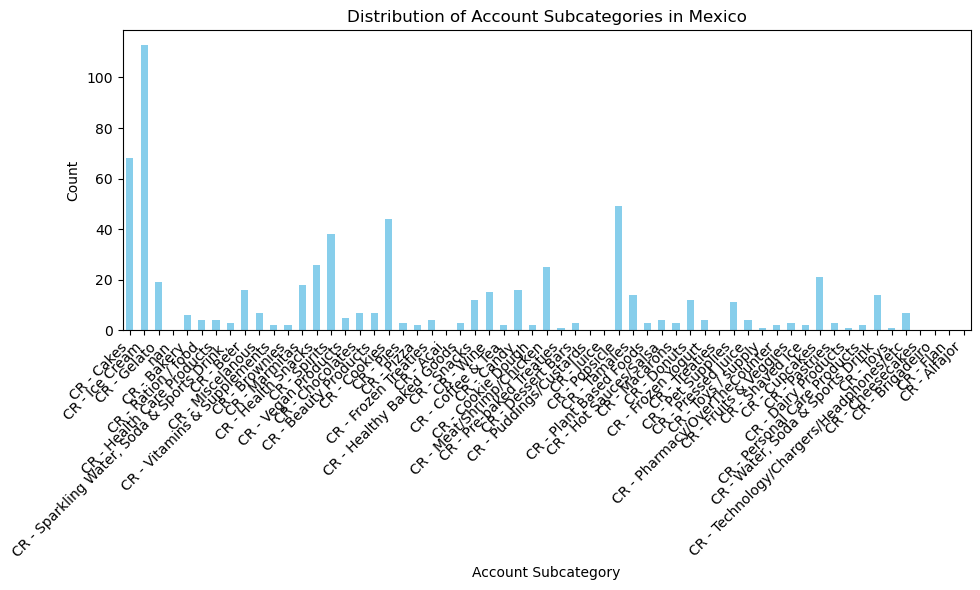

In [207]:
import pandas as pd
import matplotlib.pyplot as plt


# List of unique account subcategories
account_subcategories = df_sales['account_subcategory'].unique()

# Iterate through each country group
for country, data in grouped_by_country:
    account_subcategory_counts = data['account_subcategory'].value_counts()
    
    # Create a bar plot for each country
    plt.figure(figsize=(10, 6))
    account_subcategory_counts.reindex(account_subcategories).plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of Account Subcategories in {country}')
    plt.xlabel('Account Subcategory')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


- Here we see that icecream is the best selling category in both Mexico and Colombia, this give us an idea of the organizations that are selling more.


## Orders Descriptive analisis 


- Now we have two datasets. One containing the sales, and the other contains the orders. We can merge this dataset using the date, and the hashed_organization_name. This new dataset will contain the sales and the orders of each organization, and we can create metrics to se the performance of each one.

- To begin, we'll narrow down our focus to a specific subset of columns for analysis. Specifically, for this analysis, we will include the following columns: created_date, local_created_time, facility_timezone, order_id, ofo_slug, country_code, is_cancelled, total, tip, delivery_fee, marketing_fee, hashed_organization_name, and hashed_facility_name.

As an example, in a different scenario, we may opt to exclusively examine canceled orders. This will allow us to gain insights into the reasons behind cancellations and ultimately enhance our client service.

In [208]:
df_orders=df_orders[['created_date', 'local_created_time','country','is_cancelled','facility_timezone', 'order_id', 'ofo_slug', 'country_code', 'is_cancelled', 'total', 'tip', 'delivery_fee', 'marketing_fee', 'hashed_organization_name','hashed_facility_name']]
# Create a mapping dictionary
# Create a mapping dictionary
df_orders['created_date'] = pd.to_datetime(df_orders['created_date'])

df_orders['YearMonth'] = df_orders['created_date'].dt.to_period('M')


df_orders = pd.merge(df_orders, df_exchange, how='left', on=['YearMonth', 'country'])

df_orders['total_fee_orders_orders'] = df_orders['delivery_fee']/df_orders['exchange_rate'] + df_orders['marketing_fee']/df_orders['exchange_rate']
df_orders['total_orders']=df_orders['total']/df_orders['exchange_rate']
df_orders['order_count'] = df_orders.groupby('YearMonth')['order_id'].transform('count')
df_orders


,created_date,local_created_time,country,is_cancelled,facility_timezone,order_id,ofo_slug,country_code,is_cancelled,total,...,marketing_fee,hashed_organization_name,hashed_facility_name,YearMonth,created_month,currency_code,exchange_rate,total_fee_orders_orders,total_orders,order_count
0,2022-08-07,01:06.0,Brazil,False,America/Sao_Paulo,b2b48eee-484c-471f-b79b-04e6e7c48f0f,99food,BR,False,15.80,...,NaN,organization_411,facility_22,2022-08,2022-08-01,BRL,5.14,NaN,3.073930,47398
1,2023-06-21,26:53.0,Brazil,False,America/Sao_Paulo,9d2726ff-f6f9-3b6c-a80f-d5e64960f1f2,accon,BR,False,20.89,...,NaN,organization_518,facility_31,2023-06,2023-06-01,BRL,4.86,NaN,4.298354,60007
2,2022-11-21,25:10.0,Colombia,False,America/Bogota,4a9d4a7b-b841-44ee-b509-23f33877909a,api,CO,False,49000.00,...,NaN,organization_380,facility_6,2022-11,2022-11-01,COP,4928.88,NaN,9.941407,55200
3,2022-11-23,21:11.0,Colombia,False,America/Bogota,45514661-28ff-42c2-a3bc-6542d89790b3,api,CO,False,27000.00,...,NaN,organization_380,facility_6,2022-11,2022-11-01,COP,4928.88,NaN,5.477918,55200
4,2022-09-02,58:10.0,Colombia,False,America/Bogota,31360aec-b73f-4137-8022-504c3eee472e,cleverlynk,CO,False,23000.00,...,NaN,organization_406,facility_32,2022-09,2022-09-01,COP,4439.59,NaN,5.180659,49675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
676031,2023-04-28,09:42.0,Brazil,False,America/Sao_Paulo,d8799517-c004-46d4-a9ff-d9254f6eb397,ze,BR,False,37.77,...,NaN,organization_311,facility_19,2023-04,2023-04-01,BRL,5.02,NaN,7.523904,54279
676032,2023-05-20,48:10.0,Brazil,False,America/Sao_Paulo,f4a543aa-e626-417c-86b0-c2ee3849e9f2,ze,BR,False,107.63,...,NaN,organization_311,facility_19,2023-05,2023-05-01,BRL,5.01,NaN,21.483034,61389
676033,2023-06-18,14:46.0,Brazil,False,America/Sao_Paulo,1586af85-483e-3f43-94b7-38886acc189e,ze,BR,False,80.15,...,NaN,organization_311,facility_19,2023-06,2023-06-01,BRL,4.86,NaN,16.491770,60007
676034,2023-06-26,25:32.0,Brazil,False,America/Sao_Paulo,361011b6-a3f8-3f93-8de0-7653777b7e6d,ze,BR,False,34.67,...,NaN,organization_311,facility_19,2023-06,2023-06-01,BRL,4.86,NaN,7.133745,60007


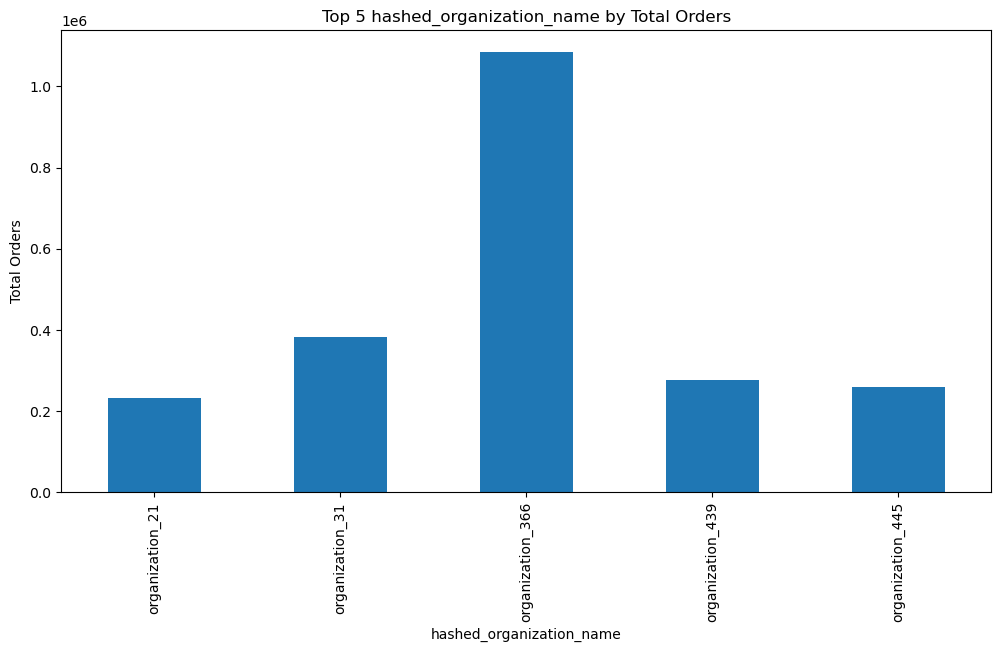

In [209]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'hashed_organization_name' and sum the 'total_orders'
grouped = df_orders.groupby('hashed_organization_name')['total_orders'].sum()

# Get the top 5 'hashed_organization_name' values by total orders
top_5_organizations = grouped.nlargest(5).index

# Filter the grouped Series to include only the top 5 organizations
grouped = grouped[grouped.index.isin(top_5_organizations)]

# Plot the results as a bar chart
grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 hashed_organization_name by Total Orders')
plt.xlabel('hashed_organization_name')
plt.ylabel('Total Orders')
plt.show()



Create the variables total_fee_orders_orders and total_orders in the us exchange to perform better analisis.

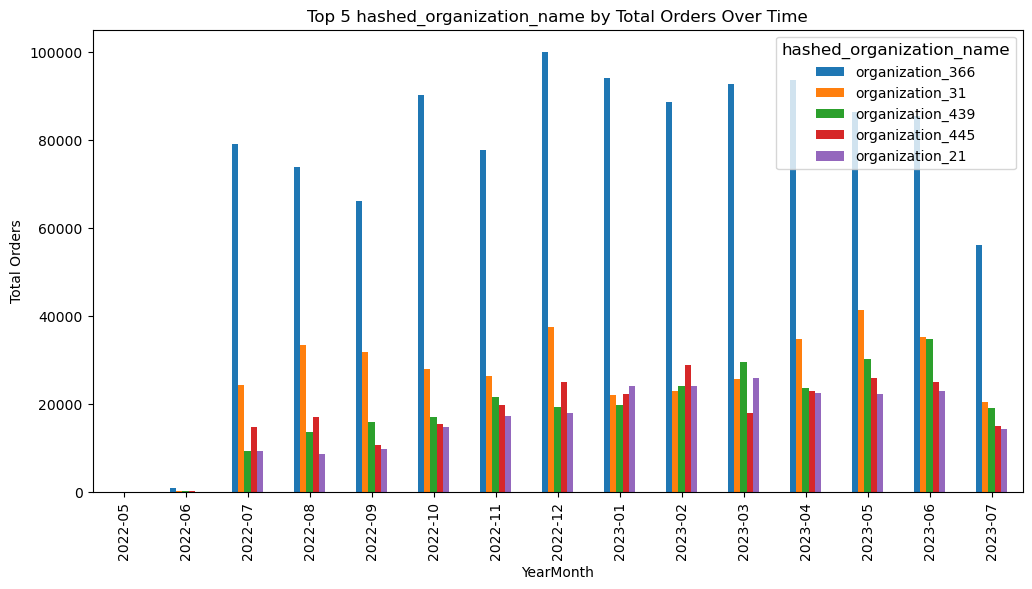

In [143]:
import matplotlib.pyplot as plt

# Group the DataFrame by 'YearMonth' and 'hashed_organization_name' and sum the 'total_orders'
grouped = df_orders.groupby(['YearMonth', 'hashed_organization_name'])['total_orders'].sum().unstack().fillna(0)

# Get the top 5 'hashed_organization_name' values by total orders
top_5_organizations = grouped.sum(axis=0).nlargest(5).index

# Filter the grouped DataFrame to include only the top 5 organizations
grouped = grouped[top_5_organizations]

# Plot the results as a bar chart
ax = grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Top 5 hashed_organization_name by Total Orders Over Time')
plt.xlabel('YearMonth')
plt.ylabel('Total Orders')
plt.legend(title='hashed_organization_name', title_fontsize='12', fontsize='10', loc='upper right')
plt.show()


The organization identified as '366' within the enterprise consistently delivers outstanding results, with sales performance that nearly doubles that of the others. Additionally, it handles twice as many orders each month.

## Inner Join orders and sales.

We are now prepared to merge these two datasets, which will enhance our understanding of the enterprise and offer more comprehensive insights.

I believe it's a sound approach to perform a join of these two datasets while grouping the data by month. This strategy will facilitate the calculation of metrics, as all the relevant data is organized by month and year. It also enables us to generate metrics for the dashboards without the need to upload the entire dataset to the cluster.

In [224]:
def count_closed_won_and_other_stages(stage_column):
    return sum(stage in ['Closed Won', 'Other'] for stage in stage_column)

# Create a new column 'stage_count' that counts 'Closed Won' and 'Other' stages
df_sales['stage_count'] = df_sales['stage'].apply(count_closed_won_and_other_stages)

In [225]:
# Group df_orders by 'created_date' and 'YearMonth'
df_orders['MonthYear'] = df_orders['created_date'].dt.to_period('M')
grouped_orders = df_orders.groupby(['MonthYear', 'country', 'hashed_organization_name']).sum().reset_index()
grouped_sales = df_sales.groupby(['YearMonth', 'country', 'hashed_organization_name']).sum().reset_index()
# Perform an inner join between the grouped DataFrames using 'country' and 'hashed_organization_name'
merged_data_month = grouped_orders.merge(grouped_sales, left_on=['country', 'hashed_organization_name', 'MonthYear'], right_on=['country', 'hashed_organization_name', 'YearMonth'], how='inner')
grouped_orders.to_csv('grouped_orders.csv')


AttributeError: Can only use .dt accessor with datetimelike values

In [188]:
merged_data_month.rename(columns={'google/ofo_score': 'google_ofo_score'}, inplace=True)
merged_data_month.dtypes
merged_data_month
#convert to excel
merged_data_month.to_excel('merged_data_month.xlsx')

# Load data to BigQuery

- Here i create a proyect and i am connecting to that project in google cloud.

In [186]:
from google.cloud import bigquery
from google.oauth2 import service_account
credentials = service_account.Credentials.from_service_account_file('C:\\Users\\David\\Documents\\Trabajo\\cloudkitchen-402816-355a28bccbe7.json')
client = bigquery.Client(project='CloudKitchen', credentials=credentials)



In [ ]:
from pandas_gbq import to_gbq

project_id = "cloudkitchen-402816"  # Use your project ID
dataset_id = "Cloud_Kitchen_id"      # Replace with your dataset ID
table_name = "Merge_Month"      # Replace with your table name

to_gbq(merged_data_month, f"{project_id}.{dataset_id}.{table_name}", project_id=project_id, if_exists="replace")


We upload all the information and we are ready to create the dashboard.